## Dealing with categorical variables using kaggle mpg dataset
- identifying categorical variables: histogram plot, values of features
- transforming categorical variables: labelEncoding and into numbers(codes), one-hot encoding/dummy variables, sklearn labelbinarizer

In [30]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('../data/input/auto-mpg.csv')

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [19]:
data = data[data['horsepower']!='?']

In [24]:
data['horsepower']=data['horsepower'].astype(str).astype(int)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [7]:
data['origin'].describe()

count    392.000000
mean       1.576531
std        0.805518
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: origin, dtype: float64

In [8]:
data['origin'].nunique() # origin is a categorical value

3

### identitfying categorical variablez

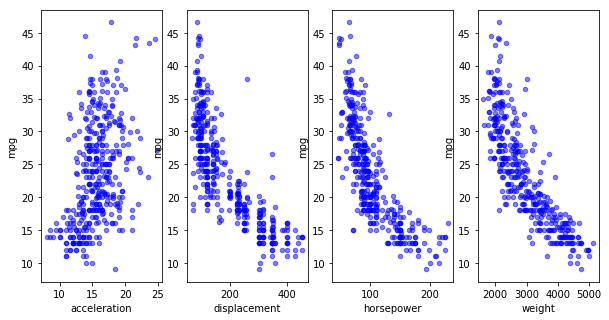

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,5))

for xcol, ax in zip(['acceleration', 'displacement', 'horsepower', 'weight'], axes):
    data.plot(kind='scatter', x=xcol, y='mpg', ax=ax, alpha=0.5, color='blue')

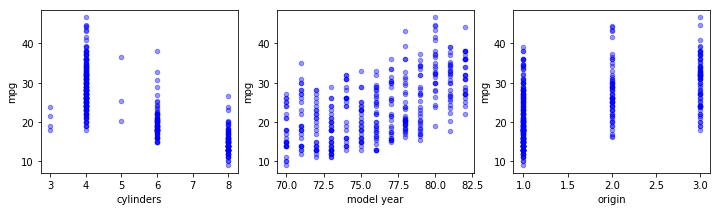

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

for xcol, ax in zip([ 'cylinders', 'model year', 'origin'], axes):
    data.plot(kind='scatter', x=xcol, y='mpg', ax=ax, alpha=0.4, color='b')

In [28]:
### 'cylinders', 'model year', 'origin' are clearly categorical variables

#### using histogram to check categorical variables

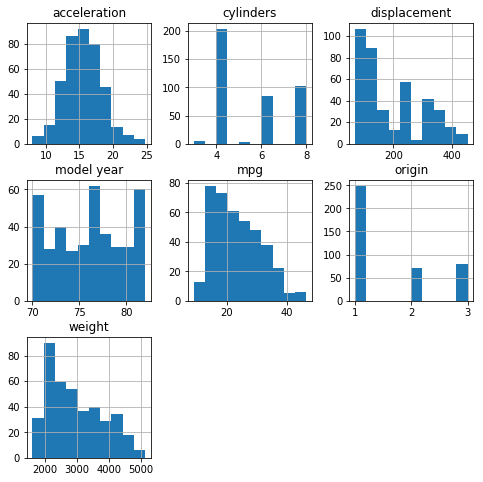

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
data.hist(ax = ax);

In [33]:
### 'cylinders', 'model year', 'origin' are clearly categorical variables

### transforming categorical variables
- label encoding
- create dummy variables

#### label encoding

In [35]:
data['origin'].unique()

array([1, 3, 2])

In [37]:
origin = ["USA", "EU", "EU", "ASIA","USA", "EU", "EU", "ASIA", "ASIA", "USA"]
origin_cat = pd.Series(origin).astype('category')

In [38]:
origin_cat

0     USA
1      EU
2      EU
3    ASIA
4     USA
5      EU
6      EU
7    ASIA
8    ASIA
9     USA
dtype: category
Categories (3, object): [ASIA, EU, USA]

#### transforming into numbers

In [39]:
# using codes, which can only be used on variables that are transformed using .astype('category')
origin_cat.cat.codes

0    2
1    1
2    1
3    0
4    2
5    1
6    1
7    0
8    0
9    2
dtype: int8

In [40]:
# using sklearn labelencoder
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

origin_encoded = lb_make.fit_transform(origin_cat)
origin_encoded

array([2, 1, 1, 0, 2, 1, 1, 0, 0, 2])

#### one-hot encoding / dummy variables

In [41]:
pd.get_dummies(origin_cat)

,ASIA,EU,USA
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1
5,0,1,0
6,0,1,0
7,1,0,0
8,1,0,0
9,0,0,1


#### using sklearn labelbinarizer

In [44]:
# one hot is required for working with regression algorithms in sklearn
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
origin_dummies = lb.fit_transform(origin)

In [46]:
origin_dummies_df = pd.DataFrame(origin_dummies, columns=lb.classes_)

In [47]:
origin_dummies_df

,ASIA,EU,USA
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1
5,0,1,0
6,0,1,0
7,1,0,0
8,1,0,0
9,0,0,1


In [48]:
lb.classes_

array(['ASIA', 'EU', 'USA'], dtype='<U4')

### include categorical variables in model

In [50]:
cylinder_dm = pd.get_dummies(data['cylinders'], prefix='cyl')
yr_dm = pd.get_dummies(data["model year"], prefix="yr")
orig_dm = pd.get_dummies(data["origin"], prefix="orig")

In [51]:
cylinder_dm

,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
5,0,0,0,0,1
6,0,0,0,0,1
7,0,0,0,0,1
8,0,0,0,0,1
9,0,0,0,0,1


In [ ]:
data = data.drop(["cylinders","model year","origin"], axis=1)

In [59]:
data = pd.concat([data, cylinder_dm, yr_dm, orig_dm], axis=1)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,cyl_3,...,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,orig_1,orig_2,orig_3
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0,...,0,0,0,0,0,0,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0,...,0,0,0,0,0,0,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0,...,0,0,0,0,0,0,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0,...,0,0,0,0,0,0,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0,...,0,0,0,0,0,0,0,1,0,0
